<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/paphos_daily_weather_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [1]:
from google.colab import data_table
data_table.disable_dataframe_formatter()

In [2]:
# @title
from datetime import datetime, timedelta

# Get today's date
today = datetime.now() - timedelta(days=1)

# Calculate the date 14 days ago
date_14_days_ago = today - timedelta(days=14)

# Format the dates in YYYY-MM-DD format
today_str = today.strftime('%Y-%m-%d')
date_14_days_ago_str = date_14_days_ago.strftime('%Y-%m-%d')

date1=date_14_days_ago_str
date2=today_str

print ("from ", date1, " to ", date2)

paphos="34.68,32.61"




location=paphos
filestr = "paphos"
unitgroup = "metric"

apikey="ET2UEWPH7KFHT289DDMPTQJFV"

#thomas
#apikey="7GV5JCTFSZYEZ2XZGJUE9SDMD"


from  2025-10-13  to  2025-10-27


In [3]:
# @title

url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")

import pandas as pd



CSV file downloaded and saved as  paphos.csv


In [4]:
# @title
import pandas as pd



df=pd.read_csv(filestr + ".csv",parse_dates=['datetime'])
df.set_index('datetime', inplace=True)
now=df



In [5]:
# @title
# copy current weather to Google Drive


from google.colab import drive
import shutil

drive.mount('/content/drive')

source_path = filestr + ".csv"

destination_path = '/content/drive/My Drive/weather/' + filestr +  today_str + ".csv"

shutil.copy(source_path, destination_path)

print(f'File saved to {destination_path}')

Mounted at /content/drive
File saved to /content/drive/My Drive/weather/paphos2025-10-27.csv


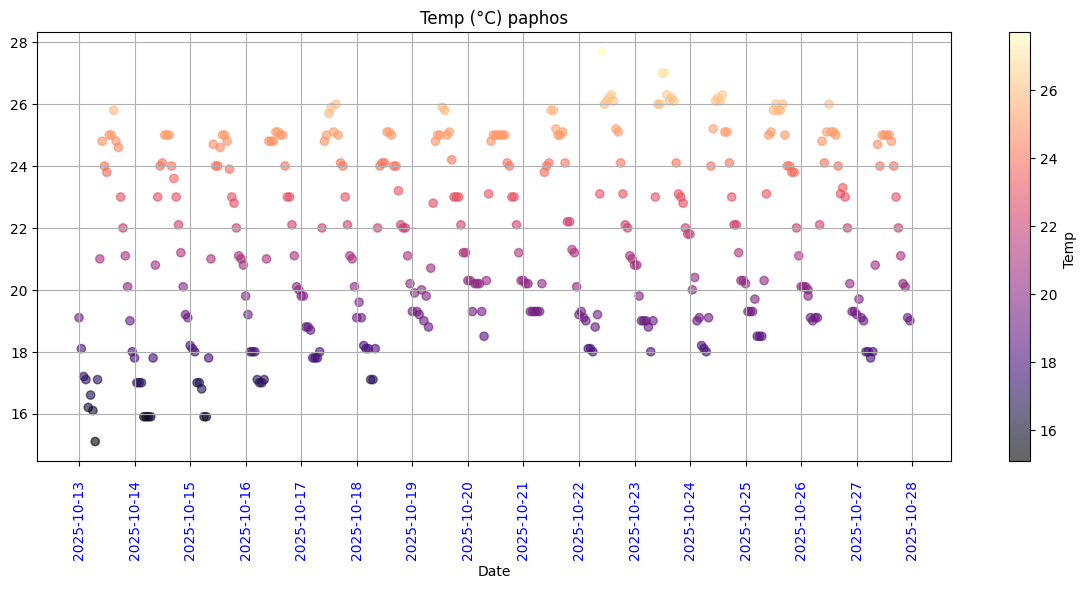

In [6]:
# @title
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))

sc = ax.scatter(df.index, df['temp'], c=df['temp'],cmap="magma",  alpha=0.6)

cbar = plt.colorbar(sc)
cbar.set_label('Temp ')

ax.set_xlabel('Date')

plt.xticks(rotation=90)

ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))

ax.tick_params(axis='x', which='minor', pad=15)


if unitgroup == "metric":
  plt.title('Temp (°C) ' + filestr)
else:
  plt.title('Temp (°F) ' + filestr)



plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()

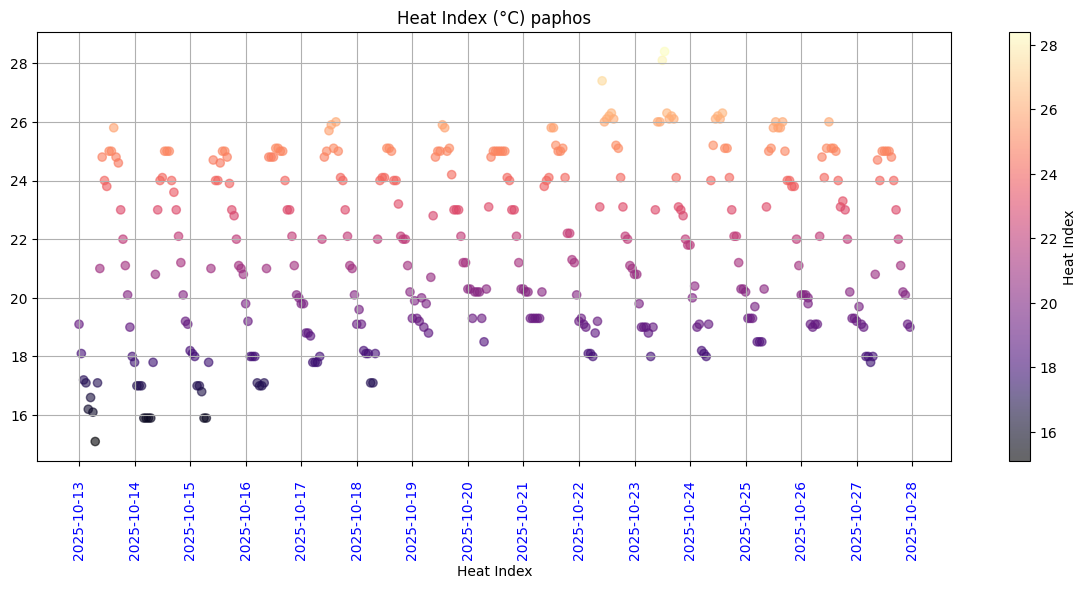

In [7]:
# @title
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Your data preparation code here (e.g., df creation, filestr, unitgroup)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'], cmap='magma', alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index')

# Set labels
ax.set_xlabel('Heat Index')
plt.xticks(rotation=90)


ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))

ax.tick_params(axis='x', which='minor', pad=15)

# Adding a title
if unitgroup == "metric":
    plt.title('Heat Index (°C) ' + filestr)
else:
    plt.title('Heat Index (°F) ' + filestr)

plt.grid()

# Displaying the chart
plt.tight_layout()
plt.show()


# Save LastYear's Data

In [8]:
# @title
# Calculate the date for 'yesterday' in UTC
yesterday = datetime.utcnow() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before yesterday' in UTC
tendays = yesterday - timedelta(days=14)
tendays_str = tendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '1 year before yesterday' in UTC
lastyearyesterday = yesterday - timedelta(days=365)
lastyearyesterday_str = lastyearyesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before 1 year before yesterday' in UTC
lastyeartendays = lastyearyesterday - timedelta(days=10)
lastyeartendays_str = lastyeartendays.strftime('%Y-%m-%dT%H:%M:%SZ')


/tmp/ipython-input-2932202836.py:3: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  yesterday = datetime.utcnow() - timedelta(days=1)


In [9]:
# @title

print("last year, last")
print("1 year before Yesterday (UTC):", lastyearyesterday_str)
print("10 days before 1 year before Yesterday (UTC):", lastyearyesterday_str)

date1=lastyeartendays_str
date2=lastyearyesterday_str

(date1,date2)

last year, last
1 year before Yesterday (UTC): 2024-10-27T03:58:25Z
10 days before 1 year before Yesterday (UTC): 2024-10-27T03:58:25Z


('2024-10-17T03:58:25Z', '2024-10-27T03:58:25Z')

In [10]:
# @title


url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")

CSV file downloaded and saved as  paphos.csv


In [11]:
# @title
lastyearstr = lastyearyesterday.strftime('%Y-%m-%d')
lastyearstr

'2024-10-27'

In [12]:
# @title
destination_path = '/content/drive/My Drive/weather/' + filestr + lastyearstr +  ".csv"

destination_path

'/content/drive/My Drive/weather/paphos2024-10-27.csv'

In [13]:
# @title


# Copy the file
shutil.copy(source_path, destination_path)

print("saving ", destination_path)

saving  /content/drive/My Drive/weather/paphos2024-10-27.csv


In [14]:
# @title
#df=pd.read_csv(filestr + ".csv",usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])

df=pd.read_csv(filestr + ".csv",parse_dates=['datetime'])

df.set_index('datetime', inplace=True)


last=df

# Intersection

* **now** now
* **last** last year


In [15]:
# @title

now['match'] = now.index.strftime('%m-%d %H:%M')
last['match'] = last.index.strftime('%m-%d %H:%M')


intersection = pd.merge(now, last, on='match', how='inner')

In [16]:
# @title
today.strftime('%m-%d-%Y %H:%M')


my=today.strftime('%m-%d-%Y 14:00')

# for match on interesection
m=today.strftime('%m-%d 14:00')


ly=lastyearyesterday.strftime('%m-%d-%Y 14:00')

print("match m=", m, "today", my, "last year", ly)





match m= 10-27 14:00 today 10-27-2025 14:00 last year 10-27-2024 14:00


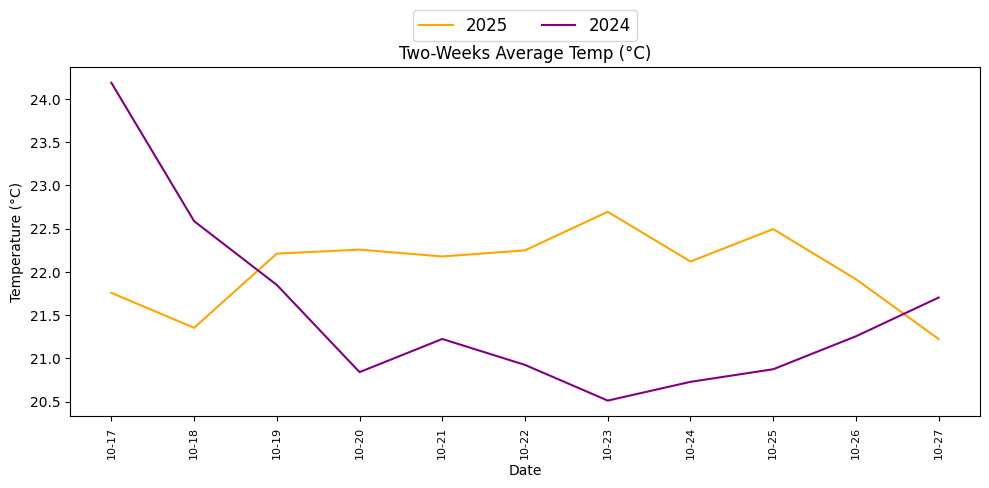

In [61]:
# @title
import matplotlib.pyplot as plt

# Select relevant columns
df = intersection[['match', 'temp_x', 'temp_y']].copy()

# Add mm-dd column
df['mm-dd'] = df['match'].str[:5]

# Group by 'mm-dd' and calculate mean
grouped = df.groupby('mm-dd')[['temp_x', 'temp_y']].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot temp_x and temp_y lines
ax.plot(grouped['mm-dd'], grouped['temp_x'], color="orange", label='2025')
ax.plot(grouped['mm-dd'], grouped['temp_y'], color="purple", label='2024')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
plt.xticks(grouped['mm-dd'], rotation=90, fontsize=8)
plt.title('Two-Weeks Average Temp (°C)')

# Add legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Get Sea Conditions

In [18]:
# @title

from datetime import datetime, timedelta
import json

# Calculate the date for 'yesterday' in UTC
yesterday = datetime.utcnow() - timedelta(days=1)
yesterday_str = yesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before yesterday' in UTC
tendays = yesterday - timedelta(days=10)
tendays_str = tendays.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '1 year before yesterday' in UTC
lastyearyesterday = yesterday - timedelta(days=365)
lastyearyesterday_str = lastyearyesterday.strftime('%Y-%m-%dT%H:%M:%SZ')

# Calculate the date for '10 days before 1 year before yesterday' in UTC
lastyeartendays = lastyearyesterday - timedelta(days=10)
lastyeartendays_str = lastyeartendays.strftime('%Y-%m-%dT%H:%M:%SZ')



apikey="b74de4f2-5352-11ef-aa85-0242ac130004-b74de5d8-5352-11ef-aa85-0242ac130004"




# https://dashboard.stormglass.io/

# https://docs.stormglass.io/?utm_medium=email&_hsenc=p2ANqtz-9NtG7HIa1BhxP3kX2NPRJLRhL3kaXEfAvVmC9k-p8qYUe0KFQrPtaz34Ucy8W71I9wyEopdsQsCGZxj-QaXWlZug1hHQ&_hsmi=290896009&utm_content=290896009&utm_source=hs_automation#/weather


import requests

params='currentDirection,currentSpeed,gust,waterTemperature,waveDirection,waveHeight,wavePeriod,windWaveDirection,windWaveHeight,windWavePeriod,windDirection,swellDirection,swellHeight,swellPeriod'


response = requests.get(
  'https://api.stormglass.io/v2/weather/point',
  params={
    'lat': 34.68,
    'lng': 32.61,
    'start' : tendays_str,
    'end' : yesterday_str,
    'params': params
  },
  headers={
    'Authorization': apikey
  }
)

# Do something with response data.
json_data = response.json()

currentSea = json_data



/tmp/ipython-input-2177676591.py:7: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  yesterday = datetime.utcnow() - timedelta(days=1)


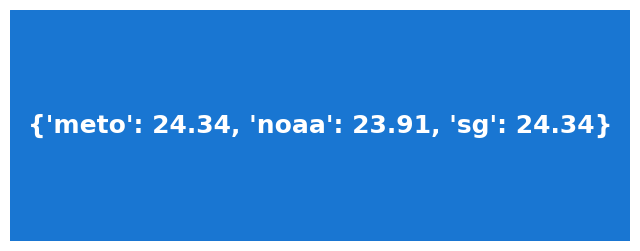

In [19]:
# @title
v = len(currentSea['hours'])
water=currentSea['hours'][v-1]['waterTemperature']

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def blue_box(text: str, figsize=(8, 3), face="#1976d2", text_color="white"):
    fig, ax = plt.subplots(figsize=figsize)
    ax.add_patch(Rectangle((0, 0), 1, 1, color=face))
    ax.text(0.5, 0.5, text, color=text_color, ha="center", va="center",
            fontsize=18, fontweight="bold", wrap=True)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis("off")
    plt.show()

# Example
blue_box(water)


In [20]:
# @title
s=currentSea['hours']
l=len(s)

less=[]

for i in range(int(l/2),l-1,4):
  less.append(s[i])

In [21]:
# @title
se=[]


for s in less:
  f=[s['time'], s['waterTemperature']['noaa'],s['waveHeight']['noaa'],s['swellHeight']['noaa'],s['windWaveHeight']['noaa']]
  g=pd.DataFrame(f).T
  g.columns=['time','temp','height', 'swell', 'wind']
  g['time'] = pd.to_datetime(g['time'])
  se.append(g)

sea=pd.concat(se,ignore_index=True)

sea.set_index("time",inplace=True)


In [22]:
# @title


seaFile =  "paphos." + today_str + ".sea.csv"

sea.to_csv(seaFile)

shutil.copy(seaFile, "/content/drive/My Drive/weather/" + seaFile)

print("saving ",  "/content/drive/My Drive/weather/" + seaFile)


saving  /content/drive/My Drive/weather/paphos.2025-10-27.sea.csv


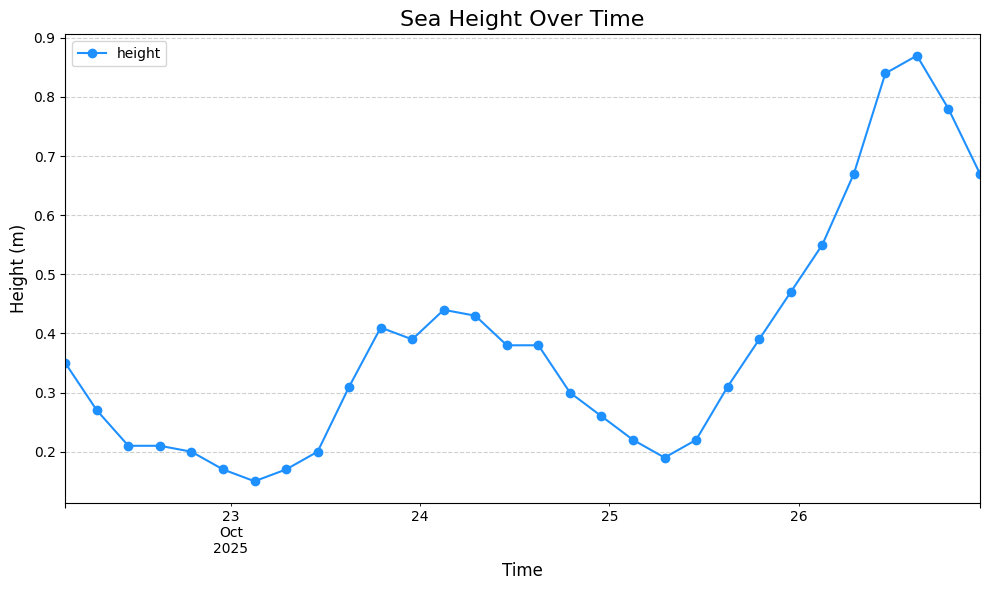

In [23]:
# @title
import matplotlib.pyplot as plt


# Plot the 'height' column with some decorations
sea['height'].plot(figsize=(10, 6), color='dodgerblue', linestyle='-', marker='o', markersize=6)


# Title and labels
plt.title('Sea Height Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)

# Customize the ticks on the x and y axes
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Add a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend (even if there's only one line)
plt.legend(['height'], loc='upper left')


# Show the plot
plt.tight_layout()
plt.show()

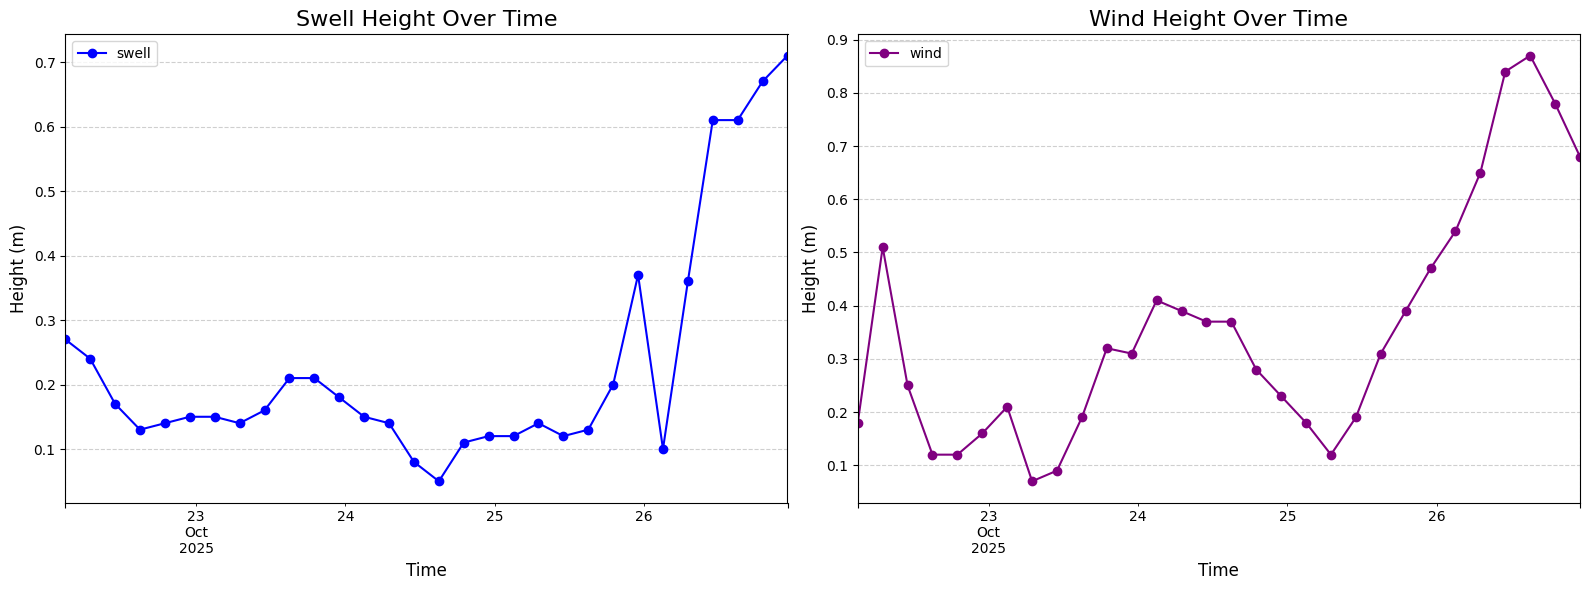

In [24]:
# @title
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
plt.figure(figsize=(16, 6))

# Subplot for swell
plt.subplot(1, 2, 1)
sea['swell'].plot(color='blue', linestyle='-', marker='o', markersize=6)
plt.title('Swell Height Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels 90 degrees
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(['swell'], loc='upper left')

# Subplot for wind
plt.subplot(1, 2, 2)
sea['wind'].plot(color='purple', linestyle='-', marker='o', markersize=6)
plt.title('Wind Height Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels 90 degrees
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(['wind'], loc='upper left')

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()



# Rain

In [25]:
# @title
rain=now.loc[now['precip'] > 0]


In [26]:
# @title
r=rain['precip'].loc[rain['precip'] > 0]

In [27]:
# @title
rainyDays=r.resample('D').sum()

In [28]:
# @title
rainyDays

,precip
datetime,
2025-10-21,0.4
2025-10-22,0.0
2025-10-23,0.0
2025-10-24,0.0
2025-10-25,0.5
2025-10-26,0.2


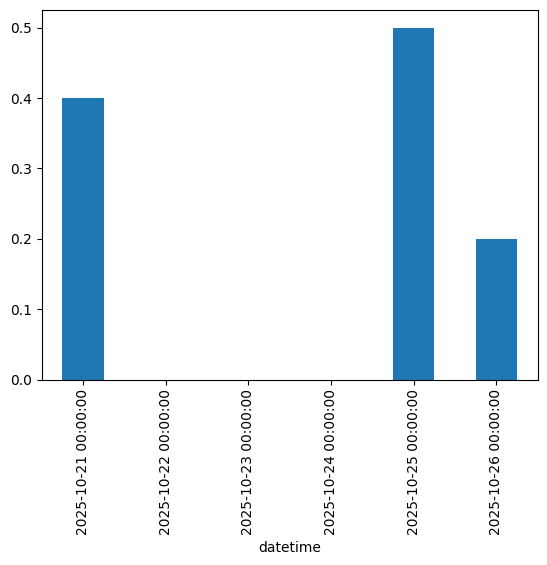

In [29]:
# @title
if r.shape[0] > 0:
  rainyDays.plot.bar('Precip')

#Wind

In [30]:
# @title

wind=now.loc[pd.Timestamp.now() - pd.Timedelta(days=2):, ['windgust', 'windspeed', 'winddir']]

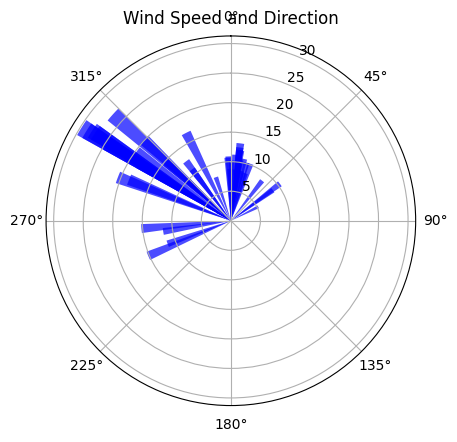

In [31]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Sample data
windspeed = wind['windspeed']  # Example wind speeds
winddir = wind['winddir']  # Wind directions in degrees

# Convert degrees to radians
winddir_radians = np.deg2rad(winddir)

# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.bar(winddir_radians, windspeed, width=0.1, color='b', alpha=0.7)  # Bars for windspeed

# Customize plot
ax.set_theta_zero_location("N")  # North at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title("Wind Speed and Direction", va='bottom')

plt.show()


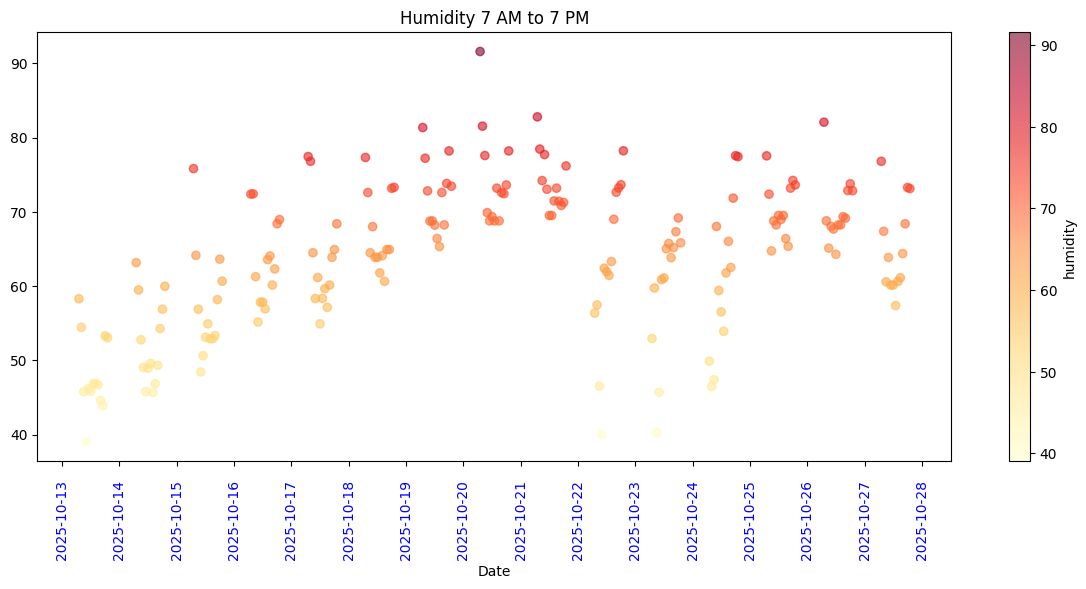

In [32]:
# @title


humidity=now.between_time('07:00', '19:00')


import matplotlib.dates as mdates
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))

sc = ax.scatter(humidity.index, humidity['humidity'], c=humidity['humidity'],cmap="YlOrRd",  alpha=0.6)

cbar = plt.colorbar(sc)
cbar.set_label('humidity')

ax.set_xlabel('Date')

plt.xticks(rotation=90)

ax.xaxis.set_major_locator(mdates.DayLocator())

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))

ax.tick_params(axis='x', which='minor', pad=15)


plt.title('Humidity 7 AM to 7 PM')



# Displaying the chart
plt.tight_layout()
plt.show()